In [13]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [28]:
#starting some initial exploration

#read in CSV
hr_df = pd.read_csv("./hr_stats.csv")

#review DF
hr_df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


In [29]:
#find out what is in the columns

print(hr_df.info())

print(hr_df.describe())

print(hr_df.describe(include = ['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

                 ID  Rising_Star  Will_Relocate  Critical  Trending Perf  \
count  14999.000000         21.0   14999.000000     480.0        14999.0   
mean    7500.000000          1.0       0.499833       1.0            3.0   
std     4329.982679          0.0       0.500017       0.0            0.0   
min        1.000000          1.0       0.000000       1.0            3.0   
25%     3750.500000          1.0       0.000000       1.0            3.0   
50%     7500.000000          1.0       0.000000       1.0            3.0   
75%    11249.500000          1.0       1.000000       1.0            3.0   
max    14999.000000          1.0       1.000000       1.0            3.0   

       Talent_Level  Validated_Talent_Level  Percent_Remote  EMP_Sat_OnPrem_1  \
count       14999.0                 14999.0    14999.000000           14871.0   
mean            6.0                     6.0        0.617321               3.0   
std             0.0                     0.0        0.193841             

Summary:
* 200 total entries, each line is a unique employee
* 5 departments
* 6 positions



In [30]:
# dropping columns to make more usable 

hr_df.drop(hr_df.columns[[1,5,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,33,39,40,41,42,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]], axis=1, inplace=True)

In [34]:
le = LabelEncoder()
hr_df['gender_binary'] = le.fit_transform(hr_df['Gender'])
hr_df['dept_no'] = le.fit_transform(hr_df['Department'])
hr_df['position_no'] = le.fit_transform(hr_df['Role'])

hr_df.head()

hr_df.to_csv('cleaned_hr.csv')

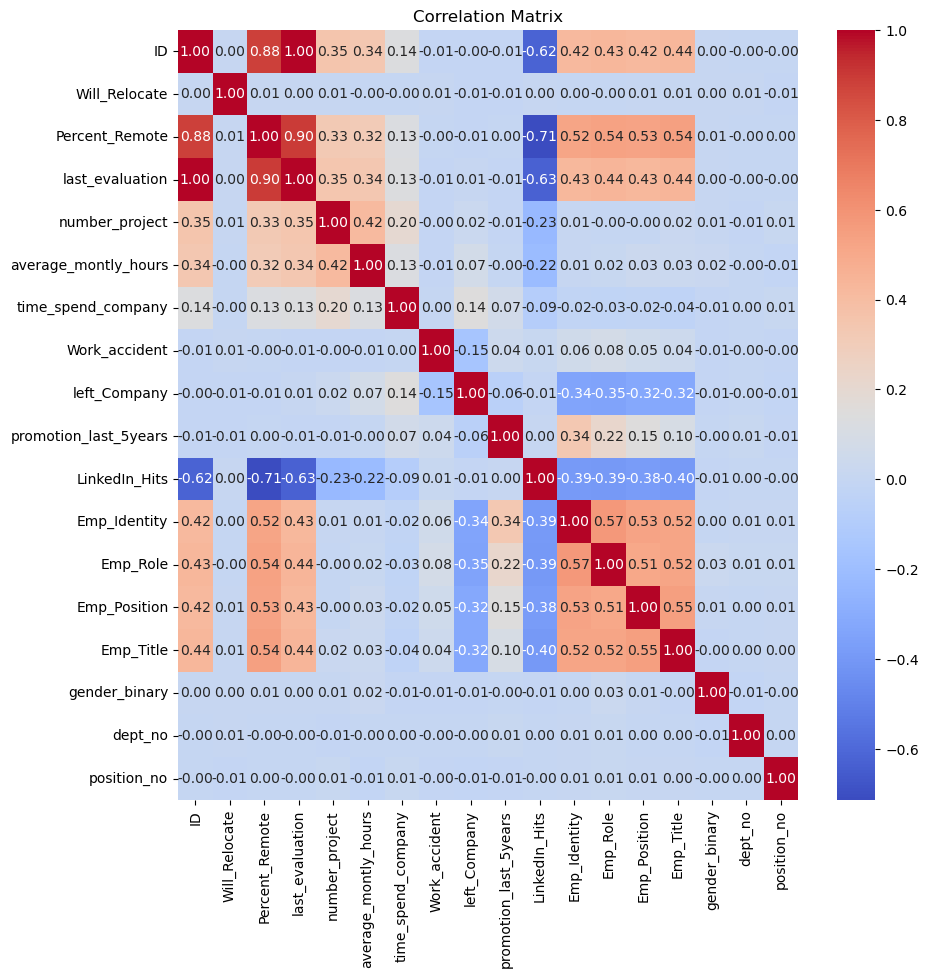

In [33]:
#correlation heatmap

# Correlation matrix
corr = hr_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()